In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 한글이 포함된 시각화를 위해 Matplotlib 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)
print("완료!")

완료!


# 데이터 불러오기

In [6]:
entry_data = pd.read_csv('/aiffel/data/entry_data.csv')
sales_data = pd.read_csv('/aiffel/data/sales_data.csv')
item_data = pd.read_csv('/aiffel/data/item_data.csv')
item_entry_data = pd.read_csv('/aiffel/data/item_entry_data.csv')

In [7]:
print(entry_data.info())
entry_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22555 entries, 0 to 22554
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요금제명    22292 non-null  object
 1   입실      22555 non-null  object
 2   퇴실      22555 non-null  object
 3   이용      22533 non-null  object
 4   위치      22555 non-null  object
 5   금액      22555 non-null  int64 
 6   구분      22555 non-null  object
 7   고객      22555 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.4+ MB
None


,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [8]:
print(sales_data.info())
sales_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   결제일시    7105 non-null   object
 1   판매위치    7105 non-null   object
 2   상품명     7105 non-null   object
 3   결제방식    7105 non-null   object
 4   비고      7105 non-null   object
 5   판매수량    7105 non-null   int64 
 6   결제금액    7105 non-null   object
 7   고객      6300 non-null   object
dtypes: int64(1), object(7)
memory usage: 444.2+ KB
None


,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507


In [9]:
print(item_data.info())
item_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      174 non-null    int64 
 1   분류      174 non-null    object
 2   상품명     174 non-null    object
 3   판매금액    174 non-null    object
dtypes: int64(1), object(3)
memory usage: 5.6+ KB
None


,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"


In [10]:
print(item_entry_data.info())
item_entry_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   순위      34 non-null     int64 
 1   분류      34 non-null     object
 2   상품명     34 non-null     object
 3   판매금액    34 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.2+ KB
None


,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"


# 문제 1: 월별 매출액 추세
### 월별 매출액 추세를 집계하고 그 결과를 시각화해봅니다.

In [11]:
# sales_data를 temp_var로 정의
temp_var = sales_data
# temp_var의 date열을 만들고, sales_date의 결제일시 중 앞에서 7번째 값까지 할당
temp_var['date'] = sales_data["결제일시"].apply(lambda x: x[:7])
temp_var = temp_var.sort_values(by='결제일시', ascending=True)
temp_var

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
7094,2021-02-17 13:12,카운터,아메리카노(HOT),현금,결제완료,1,"3,500",customer774105,2021-02
7095,2021-02-17 13:12,카운터,카페라떼(HOT),현금,결제완료,1,"4,000",customer774105,2021-02
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,"4,000",NaN,2021-02
7104,2021-02-17 13:27,카운터,카페라떼(HOT),신용카드,판매취소,-1,"-4,000",NaN,2021-02
7096,2021-02-17 13:45,선불기1,카페모카(HOT),현금,결제완료,1,"4,500",NaN,2021-02
...,...,...,...,...,...,...,...,...,...
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507,2022-04


위처럼 2021.02.17 ~ 2022.04.01 기간동안의 데이터인 것을 확인할 수 있다.

In [12]:
# sales_data의 결제금액에 포함된 쉼표(,) 지우기
temp_var["결제금액"] = temp_var["결제금액"].str.replace(",","", regex=True)
# sales_data의 결제금액을 숫자형태로 바꾸기
temp_var['결제금액'] = temp_var['결제금액'].astype('int')
# temp_var의 payment열을 date 기준으로 집계하기
payment_data = temp_var.groupby('date')['결제금액'].sum().reset_index()
payment_data

,date,결제금액
0,2021-02,7000
1,2021-03,2104500
2,2021-04,3116600
3,2021-05,2537000
4,2021-06,3621500
5,2021-07,1215000
6,2021-08,1229000
7,2021-09,1197500
8,2021-10,2138500
9,2021-11,2748500


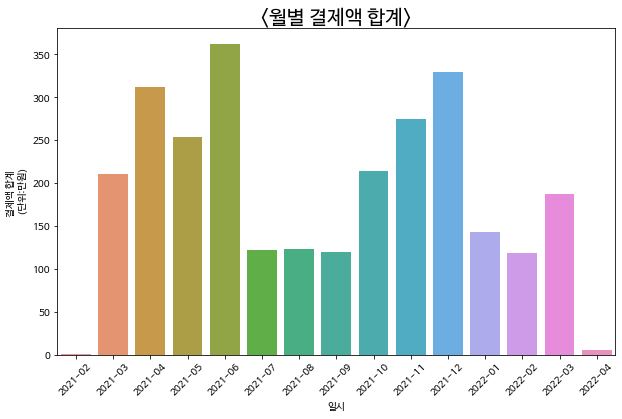

In [13]:
# 집계 결과를 시각화하기
plt.figure(figsize=(10, 6))
temp=payment_data['결제금액']/10000
sns.barplot(data=payment_data, x='date', y=temp)

plt.xlabel('일시')
plt.ylabel('결제액 합계 \n (단위:만원)')
plt.xticks(rotation=45)
plt.title('<월별 결제액 합계>',fontsize=20)
plt.show()

# 문제 2: 가장 인기 있는 음식/음료
### 여러 메뉴들(음식,음료)을 판매 개수 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.

In [14]:
# 주의! value_counts로 바로 집계하면 판매취소와 결제취소가 함께 집계됩니다.
# 따라서 '판매수량' 칼럼 값이 '-1'인 데이터를 제외하고 집계해야 합니다.
count_negative_sales = len(temp_var[temp_var['판매수량'] == -1])
print("판매수량이 -1인 데이터 개수:", count_negative_sales)

판매수량이 -1인 데이터 개수: 160


In [15]:
temp_var = temp_var[temp_var['판매수량'] > -1]
temp_var

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
7094,2021-02-17 13:12,카운터,아메리카노(HOT),현금,결제완료,1,3500,customer774105,2021-02
7095,2021-02-17 13:12,카운터,카페라떼(HOT),현금,결제완료,1,4000,customer774105,2021-02
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,4000,NaN,2021-02
7096,2021-02-17 13:45,선불기1,카페모카(HOT),현금,결제완료,1,4500,NaN,2021-02
7099,2021-02-17 13:46,카운터,아메리카노(HOT),현금,결제완료,1,3500,NaN,2021-02
...,...,...,...,...,...,...,...,...,...
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,2022-04


7105-160=6945 이므로 판매수량이 -1인 데이터가 제외됐음을 확인했다.

In [16]:
# temp_var의 상품명을 value_counts를 이용해 집계하기
x = temp_var['상품명'].value_counts()

# 집계 결과를 데이터프레임으로 변환하고, 상위 10개 선정하기
items_count = pd.DataFrame(x)
items_count.rename(columns={'상품명': '판매개수'}, inplace=True)
temp_item = items_count.head(10)
temp_item

,판매개수
김치볶음밥,1204
라면,749
짜장라면,455
치즈불고기볶음밥,420
계란추가,314
낙지볶음밥,312
새우볶음밥,309
아메리카노(ICE),284
치즈감자튀김,246
감자튀김,242


In [17]:
temp_item = temp_item.copy()
temp_item['순위'] = temp_item['판매개수'].rank(ascending=False, method='min').astype(int)

temp_item

,판매개수,순위
김치볶음밥,1204,1
라면,749,2
짜장라면,455,3
치즈불고기볶음밥,420,4
계란추가,314,5
낙지볶음밥,312,6
새우볶음밥,309,7
아메리카노(ICE),284,8
치즈감자튀김,246,9
감자튀김,242,10


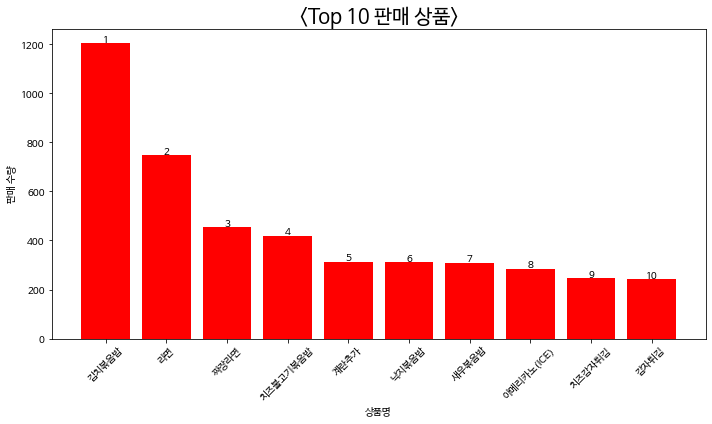

In [18]:
# 그래프 데이터 설정
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정
bars = plt.bar(temp_item.index, temp_item['판매개수'],color='r')  # 막대 그래프 생성

# 순위 표시
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, str(temp_item['순위'].iloc[i]), ha='center')

    
# 그래프 제목과 축 레이블 설정
plt.title('<Top 10 판매 상품>',fontsize=20)
plt.xlabel('상품명')
plt.ylabel('판매 수량')

# x 축 라벨 회전
plt.xticks(rotation=45)  # x 축 라벨을 45도 회전

# 그래프 표시
plt.tight_layout()  # 그래프가 잘리지 않도록 설정
plt.show()

In [19]:
# temp_var의 payment열을 상품명을 기준으로 집계하기
items_payment = temp_var.groupby('상품명')['결제금액'].sum().reset_index()
# item_payment의 값을 내림차순으로 정렬하고 상위 10개 도출하기
items_payment = items_payment.sort_values(by='결제금액', ascending=False).reset_index(drop=True)
temp_payment = items_payment.head(10)
temp_payment

,상품명,결제금액
0,김치볶음밥,6004400
1,라면,2941500
2,치즈불고기볶음밥,2292600
3,짜장라면,2038500
4,낙지볶음밥,1710700
5,새우볶음밥,1539800
6,치즈감자튀김,1354200
7,감자튀김,1083800
8,아메리카노(ICE),1058100
9,불닭볶음면,693000


In [20]:
temp_payment = temp_payment.copy()
temp_payment['순위'] = temp_payment['결제금액'].rank(ascending=False, method='min').astype(int)

temp_payment

,상품명,결제금액,순위
0,김치볶음밥,6004400,1
1,라면,2941500,2
2,치즈불고기볶음밥,2292600,3
3,짜장라면,2038500,4
4,낙지볶음밥,1710700,5
5,새우볶음밥,1539800,6
6,치즈감자튀김,1354200,7
7,감자튀김,1083800,8
8,아메리카노(ICE),1058100,9
9,불닭볶음면,693000,10


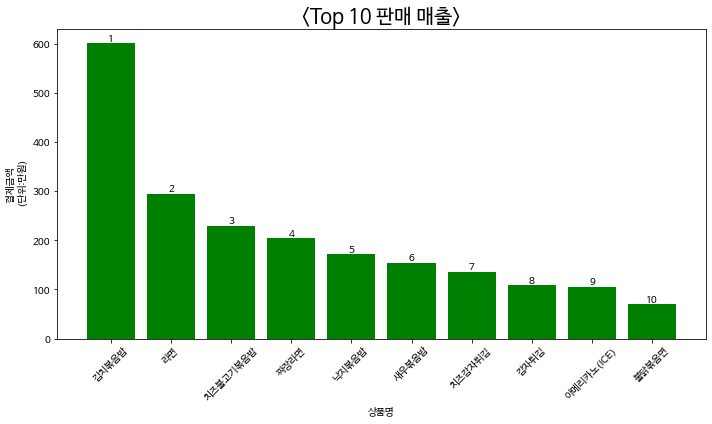

In [21]:
# 그래프 데이터 설정
plt.figure(figsize=(10, 6))
temp=temp_payment['결제금액']/10000
bars = plt.bar(temp_payment['상품명'], temp, color='g')

# 순위 표시
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, str(temp_payment['순위'].iloc[i]), ha='center')

# 그래프 제목과 축 레이블 설정
plt.title('<Top 10 판매 매출>',fontsize=20)
plt.xlabel('상품명')
plt.ylabel('결제금액 \n (단위:만원)')

# x 축 라벨 회전
plt.xticks(rotation=45)

# 그래프 표시
plt.tight_layout()
plt.show()

# 문제3: 가장 많이 팔린 입장권 종류
### 여러 입장권 종류를 판매 매출(판매 개수 x 금액) 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.

In [22]:
# 활용할 데이터(entry_data)를 temp_var로 정의하기
temp_var = entry_data
temp_var.head()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [23]:
# temp_var의 금액을 숫자형태로 변환하기
temp_var['금액'] = temp_var['금액'].astype('int')
# temp_var의 금액을 요금제명을 기준으로 집계하기
tickets= temp_var.groupby('요금제명')['금액'].sum().reset_index()
# tickets의 값을 내림차순으로 정렬하고 상위 10개 도출하기
temp_tickets = tickets.sort_values(by='금액', ascending=False).reset_index(drop=True).head(10)
temp_tickets.rename(columns={'금액': '결제금액'}, inplace=True)
temp_tickets

,요금제명,결제금액
0,한국대생 입장권(종일권),70037000
1,입장권(종일권),23570500
2,심야-조조무제한(06시까지),11600000
3,심야-조조무제한,6221000
4,한국대생 무제한 입장권,5207500
5,시간요금제(1시간),2665500
6,시간요금제(3시간),2042000
7,무제한 입장권,1568600
8,18시이후 무제한,1330500
9,조조무제한,693000


In [24]:
temp_tickets = temp_tickets.copy()
temp_tickets['순위'] = temp_tickets['결제금액'].rank(ascending=False, method='min').astype(int)

temp_tickets

,요금제명,결제금액,순위
0,한국대생 입장권(종일권),70037000,1
1,입장권(종일권),23570500,2
2,심야-조조무제한(06시까지),11600000,3
3,심야-조조무제한,6221000,4
4,한국대생 무제한 입장권,5207500,5
5,시간요금제(1시간),2665500,6
6,시간요금제(3시간),2042000,7
7,무제한 입장권,1568600,8
8,18시이후 무제한,1330500,9
9,조조무제한,693000,10


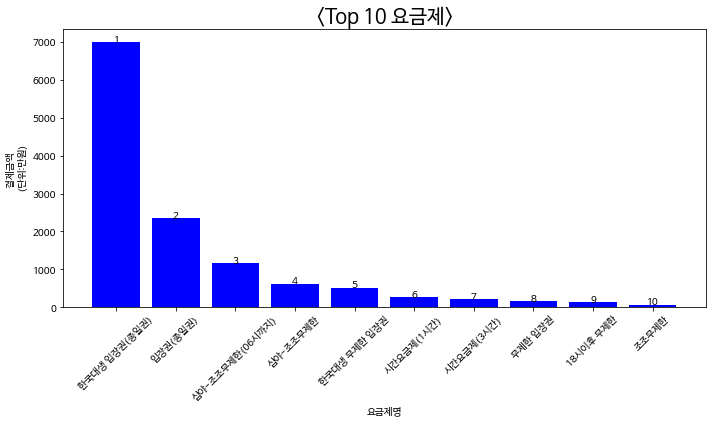

In [25]:
# 그래프 데이터 설정
plt.figure(figsize=(10, 6))
temp=temp_tickets['결제금액']/10000
bars = plt.bar(temp_tickets['요금제명'], temp, color='b')

# 순위 표시
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, str(temp_tickets['순위'].iloc[i]), ha='center')

# 그래프 제목과 축 레이블 설정
plt.title('<Top 10 요금제>',fontsize=20)
plt.xlabel('요금제명')
plt.ylabel('결제금액 \n (단위:만원)')

# x 축 라벨 회전
plt.xticks(rotation=45)

# 그래프 표시
plt.tight_layout()
plt.show()

# 내가 정의한 문제 해결하기

In [28]:
hours = ['입실', '퇴실']
data= entry_data[hours]
data

,입실,퇴실
0,2022-04-01 23:39,2022-04-02 0:39
1,2022-04-01 23:39,2022-04-02 0:39
2,2022-04-01 20:55,2022-04-01 21:41
3,2022-04-01 20:55,2022-04-01 21:41
4,2022-04-01 19:54,2022-04-01 22:28
...,...,...
22550,2021-02-17 13:09,2021-02-17 14:19
22551,2021-02-17 13:09,2021-02-17 14:19
22552,2021-02-17 13:06,2021-02-17 14:19
22553,2021-02-17 13:06,2021-02-17 14:19


In [29]:
entry_data = pd.DataFrame(entry_data)

entry_data

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928
...,...,...,...,...,...,...,...,...
22550,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22551,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22552,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105
22553,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105


In [30]:
# 날짜 형식으로 변환
entry_data['입실'] = pd.to_datetime(entry_data['입실'])
entry_data['퇴실'] = pd.to_datetime(entry_data['퇴실'])

In [31]:
# 'next_day_checkout' 칼럼 생성
entry_data['next_day_checkout'] = 0  # 초기값 0으로 설정
entry_data.loc[entry_data['입실'].dt.date != entry_data['퇴실'].dt.date, 'next_day_checkout'] = 1

entry_data

,요금제명,입실,퇴실,이용,위치,금액,구분,고객,next_day_checkout
0,시간요금제(1시간),2022-04-01 23:39:00,2022-04-02 00:39:00,오전 1:00:00,선불기2,3000,퇴실,customer263717,1
1,시간요금제(1시간),2022-04-01 23:39:00,2022-04-02 00:39:00,오전 1:00:00,선불기2,3000,퇴실,customer263717,1
2,무제한 입장권,2022-04-01 20:55:00,2022-04-01 21:41:00,오전 12:46:00,선불기2,7400,퇴실,customer247263,0
3,무제한 입장권,2022-04-01 20:55:00,2022-04-01 21:41:00,오전 12:46:00,선불기2,7400,퇴실,customer247263,0
4,한국대생 무제한 입장권,2022-04-01 19:54:00,2022-04-01 22:28:00,오전 2:33:00,선불기2,7400,퇴실,customer388928,0
...,...,...,...,...,...,...,...,...,...
22550,종일요금제,2021-02-17 13:09:00,2021-02-17 14:19:00,오전 1:10:00,선불기1,6500,퇴실,customer774105,0
22551,종일요금제,2021-02-17 13:09:00,2021-02-17 14:19:00,오전 1:10:00,선불기1,6500,퇴실,customer774105,0
22552,종일요금제,2021-02-17 13:06:00,2021-02-17 14:19:00,오전 1:13:00,선불기1,7000,퇴실,customer774105,0
22553,종일요금제,2021-02-17 13:06:00,2021-02-17 14:19:00,오전 1:13:00,선불기1,7000,퇴실,customer774105,0


In [32]:
entry_data = entry_data.sort_values(by='입실')

entry_data

,요금제명,입실,퇴실,이용,위치,금액,구분,고객,next_day_checkout
22554,종일요금제,2021-02-17 12:58:00,2021-02-17 14:19:00,오전 1:21:00,선불기1,7000,퇴실,customer774105,0
22553,종일요금제,2021-02-17 13:06:00,2021-02-17 14:19:00,오전 1:13:00,선불기1,7000,퇴실,customer774105,0
22552,종일요금제,2021-02-17 13:06:00,2021-02-17 14:19:00,오전 1:13:00,선불기1,7000,퇴실,customer774105,0
22551,종일요금제,2021-02-17 13:09:00,2021-02-17 14:19:00,오전 1:10:00,선불기1,6500,퇴실,customer774105,0
22550,종일요금제,2021-02-17 13:09:00,2021-02-17 14:19:00,오전 1:10:00,선불기1,6500,퇴실,customer774105,0
...,...,...,...,...,...,...,...,...,...
4,한국대생 무제한 입장권,2022-04-01 19:54:00,2022-04-01 22:28:00,오전 2:33:00,선불기2,7400,퇴실,customer388928,0
3,무제한 입장권,2022-04-01 20:55:00,2022-04-01 21:41:00,오전 12:46:00,선불기2,7400,퇴실,customer247263,0
2,무제한 입장권,2022-04-01 20:55:00,2022-04-01 21:41:00,오전 12:46:00,선불기2,7400,퇴실,customer247263,0
1,시간요금제(1시간),2022-04-01 23:39:00,2022-04-02 00:39:00,오전 1:00:00,선불기2,3000,퇴실,customer263717,1


In [33]:
# # 날짜를 datetime 형식으로 변환
# temp_var['입실'] = pd.to_datetime(temp_var['입실'])
# temp_var['퇴실'] = pd.to_datetime(temp_var['퇴실'])

# # 시간 형식으로 변경
# # temp_var['입실'] = temp_var['입실'].dt.strftime('%H:%M:%S')
# # temp_var['퇴실'] = temp_var['퇴실'].dt.strftime('%H:%M:%S')

# # temp_var

In [34]:
hourly_counts = entry_data.groupby('입실').size()
hourly_counts = hourly_counts.reindex(pd.Index(range(24)), fill_value=0)  # 모든 시간대를 포함하도록 채우기


hourly_counts

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
dtype: int64

In [35]:
# 시간대별로 재실 인원 수 계산
for index, row in entry_data.iterrows():
    if row['next_day_checkout'] == 0:
        if row['입실'] == row['퇴실']:
            hours = 1
            start_hour = row['입실'].hour
        else:
            hours = (row['퇴실'] - row['입실']).seconds // 3600 
            start_hour = row['입실'].hour
        for i in range(hours+1):
            # 시간대가 0부터 23까지인지 확인하여 범위 내에서만 처리
            if start_hour + i < 24:
                hourly_counts[start_hour + i] += 1
    elif row['next_day_checkout'] == 1:
        evening_hours = (pd.Timestamp('23:59:59') - row['입실']).seconds // 3600
        morning_hours = (row['퇴실'] - pd.Timestamp('00:00:00')).seconds // 3600
        for i in range(evening_hours + 1):
            # 시간대가 0부터 23까지인지 확인하여 범위 내에서만 처리
            if row['입실'].hour + i < 24:
                hourly_counts[row['입실'].hour + i] += 1
        for i in range(morning_hours + 1):
            # 시간대가 0부터 23까지인지 확인하여 범위 내에서만 처리
            if i < 24:
                hourly_counts[i] += 1

hourly_counts

0     6278
1     5383
2     4558
3     3561
4     2801
5     2146
6     1091
7     1002
8     1092
9     1360
10    1699
11    2172
12    3233
13    4682
14    6425
15    7735
16    8598
17    8247
18    7473
19    7521
20    7659
21    7580
22    7026
23    6466
dtype: int64

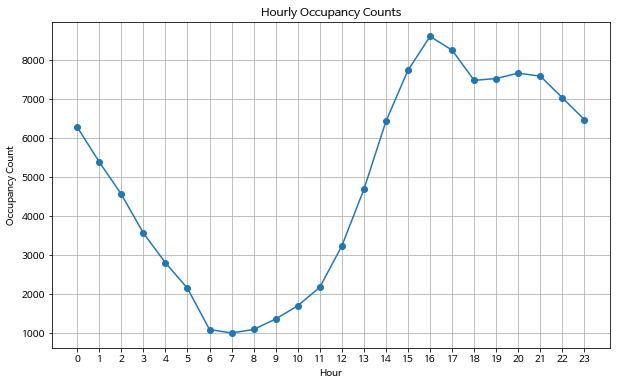

In [36]:
# 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.plot(range(24), hourly_counts, marker='o', linestyle='-')
plt.title('Hourly Occupancy Counts')
plt.xlabel('Hour')
plt.ylabel('Occupancy Count')
plt.grid(True)
plt.xticks(range(24))  # x 축 눈금 설정 (0부터 23까지)
plt.show()

--> 오후시간대에 이용자가 많은것으로 보아 item 항목 중 식사류 판매 비중이 높을 것으로 예상된다.

In [38]:
sales_data = pd.read_csv('/aiffel/data/sales_data.csv')

In [39]:
#금액 데이터를 숫자형으로 변환
sales_data['결제금액'] = sales_data['결제금액'].str.replace('원', '').str.replace(',', '').astype(int)

In [40]:
#각 고객의 총 소비 금액 계산
sales_data['결제일시'] = pd.to_datetime(sales_data['결제일시'])


In [41]:
hourly_sales = sales_data.groupby(sales_data['결제일시'].dt.hour)['결제금액'].sum().reset_index()

In [42]:
print(sales_data.head())


                 결제일시  판매위치          상품명  결제방식    비고  판매수량  결제금액  \
0 2022-04-01 19:41:00  선불기1   치킨카라아케 6pc  신용카드  결제완료     1  4500   
1 2022-04-01 19:41:00  선불기1   짜장라면(계란추가)  신용카드  결제완료     1  5500   
2 2022-04-01 19:41:00  선불기1           라면  신용카드  결제완료     1  4000   
3 2022-04-01 19:41:00  선불기1   비엔나소세지(토핑)  신용카드  결제완료     1  1000   
4 2022-04-01 19:41:00  선불기1  라면(계란/치즈추가)  신용카드  결제완료     1  5000   

               고객  
0  customer275507  
1  customer275507  
2  customer275507  
3  customer275507  
4  customer275507  


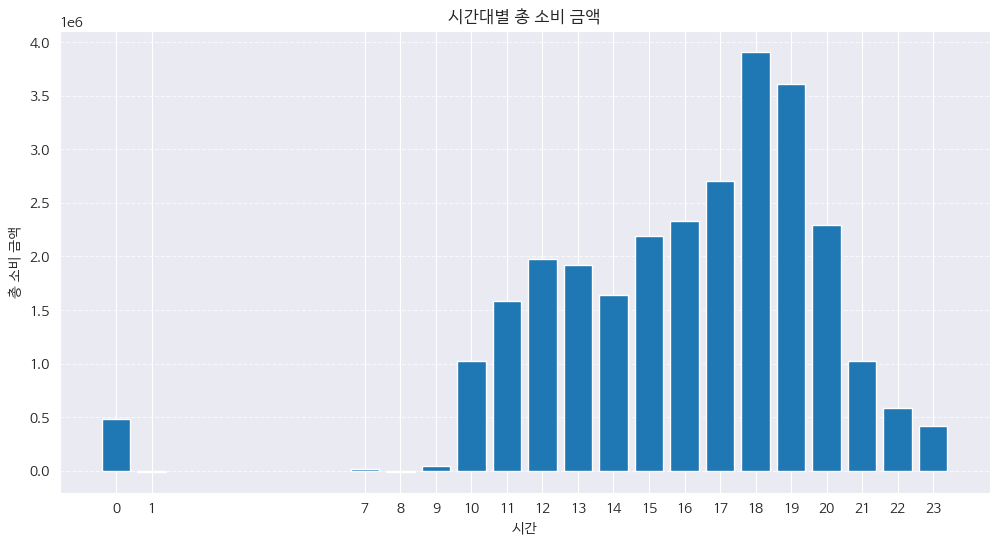

In [121]:
# 시각화
plt.figure(figsize=(12, 6))
plt.bar(hourly_sales['결제일시'], hourly_sales['결제금액'])  # x값과 y값을 올바르게 설정
plt.xlabel('시간')
plt.ylabel('총 소비 금액')
plt.title('시간대별 총 소비 금액')
plt.xticks(hourly_sales['결제일시'])  # x 축에 시간 정보 표시
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)
plt.show()

위 두 그래프가 유사한 형태를 보이고 있다. 즉, 재실 인원이 많은 시간대에 item 소비 금액도 높은 것으로 볼 수 있다.

따라서, 이용권에 대한 마케팅을 진행한다면 item의 소비도 늘 것으로 예상된다.


# 회고
작성자 : 이은영

### 이번 프로젝트를 하면서 어려웠던 점
이번 프로젝트를 진행하면서 데이터의 기준을 잡는 것이 어려웠습니다.

### 이번 프로젝트에서 학습한 내용
상황 인식과 문제 정의에 대해서 학습하고문제를 해결하기 위해 필요한 데이터를 인지하고, 데이터 분석을 통해 결론을 도출하는 방법을 배웠습니다. 

### 어려웠던 점
이용자의 이용시간을 시간대별로 누적 그래프를 그리는 과정에 전날 입실해서 다음날 퇴실하는 이용자를 처리하는 부분이 생각보다 오래 걸렸습니다. 
또 결과를 도출하는 부분에서 기준이 무엇이냐에 따라 결론이 달라질 수 있는데 이번 프로젝트는 어느정도 마케팅에 관한 지식이 필요했던 것 같습니다. 

### 느낀점
이번 프로젝트를 통해 세가지 파일로 여러가지 상관관계를 분석할 수 있었습니다. 따라서 기본정보로 여러가지 분석을 해볼 수 있었던 것이 유익한 학습이 된 것 같습니다.